In [87]:
import pandas as pd
test = pd.read_csv('/Users/miji.lee/Desktop/ML Practice/titanic/test.csv')
train = pd.read_csv('/Users/miji.lee/Desktop/ML Practice/titanic/train.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
# missing values

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
train.duplicated().sum()
# train.drop_duplicates(subset =['PassengerId'], inplace = True)

np.int64(0)

In [90]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
train[train['Age']<1].head()
# dataset[select rows that meet the condition]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


In [92]:
train[(train['Age']>=1)& (train['Age']<=2)].head()
# 복수 조건을 두개 만족해야 할때는 dataset[(select rows with condition 1) & (select rows with condition 2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S


In [93]:
# training에서 어떤 피쳐가 예측값에 가장 영향을 많이 미치나 파악해야
# 어떤 상관관계를 맺고 있나 -> heatmap (only continuous. category식 데이터는 어려움)
corr_matrix = train.corr(numeric_only= True)
# 문자열 데이터와 같이 숫자가 없는 데이터간 상관관계는 논리적으로 말이 안됨 -> 수치형만 포함시키도록
# 그 수치형이 ID같은 범주형 데이터라도 어느정도 상관관계가 보여짐

corr_matrix
# pearson correlation. 1에 가까우면 한 피쳐가 증가하면 다른 피쳐도 증가. -1은 역관계

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [94]:
import plotly.express as px

fig_px = px.imshow(corr_matrix, text_auto=True, aspect='auto', 
          title= 'Correlation Heatmap', 
          color_continuous_scale='Blues')

fig_px.show()
#  알고 싶은 것은 survived 이므로 그것과 다른 변수간의 관계를 중점으로 봄
#  fare색상이 진해보임

In [95]:
# 히트맵으로 안나오는 카테고리형 데이터와 survived의 관계를 알아보자 
survived = train[train['Survived']==1]['Sex'].value_counts()
# survived 칼럼== 1 조건을 만족하는 row number를 뽑아서 train 데이터셋으로 새로운 데이터프레임의 sex칼럼을 뽑음
# 갯수 셈
survived

Sex
female    233
male      109
Name: count, dtype: int64

In [96]:
dead = train[train['Survived']==0]['Sex'].value_counts()
dead

Sex
male      468
female     81
Name: count, dtype: int64

In [97]:
df_0 = pd.DataFrame([survived, dead])
df_0
# 만약 'survived', 'dead'처럼 감싸면 
# 0 survived
# 1 dead 처럼 단순한 문자열로 인식.

# survived, dead는 세로로 된 series같이 보이지만 사실은 가로 행으로 구성되있음
# 행데이터들을 pd.DataFrame은 세로로 합친 것

Sex,female,male
count,233,109
count,81,468


In [98]:
df_0.index = ['Survived', 'Dead']
# index: 맨 앞 칼럼
df_0

Sex,female,male
Survived,233,109
Dead,81,468


In [99]:
# 동일하게 concat으로 할수도 있음

df1 = pd.concat([survived, dead], axis =1)
# 1은 옆으로 늘고 0은 위아래로 늘음
df1.columns = ['Survived','Dead']
print(df1)

        Survived  Dead
Sex                   
female       233    81
male         109   468


In [100]:
result = []  # feature 이름을 key로, DataFrame을 value로
features = ['Sex', 'Pclass']

def fct(feature):
    for feature in features:
        survived =train[train['Survived']==1][feature].value_counts()
        dead = train[train['Survived']==0][feature].value_counts()
        df_graph = pd.DataFrame([survived, dead])
        df_graph.index = ['Survived', 'Dead']
        result.append(df_graph)
        result_df = pd.concat(result, axis =0)
    return result_df

# 함수 실행 후 반환값을 변수에 저장
result_1 = fct(features)


In [101]:
# 같은 내용을 재활용을 위해 함수로 바꾸면

def visualisation(feature):
    survived =train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df_graph = pd.DataFrame([survived, dead])
    df_graph.index = ['Survived', 'Dead']
    return df_graph

In [102]:
df_visual = visualisation('Sex')
df_visual.head()

Sex,female,male
Survived,233,109
Dead,81,468


In [103]:
# 절대 빈도는 막대 그래프 (남자에 비해 여자가 더 많이 살았다)
# 상대 빈도는 파이 차트 (여자 중 사망한 %)

fig  = px.bar(df_0,
       x = df_0.index,
       y = df_0.columns,
       barmode = 'group',
        text_auto = True,
       title ='Survived Count by Sex')

fig.show()

In [104]:
df_pc = visualisation('Pclass')
df_pc

Pclass,1,3,2
Survived,136,119,87
Dead,80,372,97


In [105]:
fig = px.bar(df_pc,
       x=df_pc.index,
       y=df_pc.columns,
       barmode ='stack',
       text_auto = True,
       title ='Survived Count by Class')
fig.show()

In [106]:
# 등급을 x축에 놓고 등급별로 확인하려면 plotly 특성상 x축은 인덱스만 쓸 수 있음
# 지금 인덱스는 생존 여부이므로 transpose

df_transpose = df_pc.transpose()
df_transpose

,Survived,Dead
Pclass,,
1,136,80
3,119,372
2,87,97


In [107]:
fig = px.bar(df_transpose,
       x=df_transpose.index,
       y=df_transpose.columns,
       barmode ='stack',
       text_auto = True,
       title ='Survived Count by Class')
fig.show()

In [108]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Pie(labels =df_pc.index,
           values = df_pc[1],
           domain = {'x':[0,0.33], 'y':[0,1]})
),

fig.add_trace(
    go.Pie(labels =df_pc.index,
           values = df_pc[2],
           domain = {'x':[0.33,0.66], 'y':[0,1]})
),

fig.add_trace(
    go.Pie(labels =df_pc.index,
           values = df_pc[3],
           domain = {'x':[0.66,1], 'y':[0,1]})
)

fig.show()


In [109]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [110]:
train['Embarked'].isnull().sum()

np.int64(2)

In [111]:
df = visualisation('Embarked')
df_t = df.transpose()

fig = px.bar(
    data_frame = df_t,
    x = df_t.index,
    y = df_t.columns,
    barmode= 'stack',
    text_auto =True,
    title = 'Survival Rate by Embarkation'
)

fig.show()

In [112]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Pie(labels =df.index,
           values = df['S'],
           domain = {'x':[0,0.33], 'y':[0,1]})
),

fig.add_trace(
    go.Pie(labels =df.index,
           values = df['C'],
           domain = {'x':[0.33,0.66], 'y':[0,1]})
),

fig.add_trace(
    go.Pie(labels =df.index,
           values = df['Q'],
           domain = {'x':[0.66,1], 'y':[0,1]})
)


fig.update_layout(
    annotations = [
        dict(text = 'S',
             x=0.165,
             y=1.1,
             showarrow =False
             ),
        dict(text = 'C',
             x=0.495,
             y=1.1,
             showarrow =False
             ),
        dict(text = 'Q',
             x=0.83,
             y=1.1,
             showarrow =False
             )
    ]
)

fig.show()


수치형 전처리


In [113]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [114]:
train['Age'].isnull().sum()
# 없는 행이 177개나 되므로 나중에 보완

np.int64(177)

In [115]:
# unstack 

# 멀티 인덱스를 싱글 2차원 인덱스로 바꾸고 나머지는 컬럼명으로 넣어버려서 일반 데이터프레임처럼 쓰도록

df = pd.DataFrame({'Category': ['A','A', 'B', 'B'],
              'Number': [1,2,1,2],
              'Value': [10,20,30,40]})

grouped = df.groupby(['Category', 'Number'])['Value'].sum()

print(grouped)
print(type(grouped))
print(grouped.index)
print(grouped.values)

Category  Number
A         1         10
          2         20
B         1         30
          2         40
Name: Value, dtype: int64
<class 'pandas.core.series.Series'>
MultiIndex([('A', 1),
            ('A', 2),
            ('B', 1),
            ('B', 2)],
           names=['Category', 'Number'])
[10 20 30 40]


In [116]:
# 멀티 인덱스 중 가장 오른쪽에 있는 컬럼을 위로 올려버림 

grouped_u = grouped.unstack()

print(grouped_u) 
type(grouped_u)
print(grouped_u.index)
print(grouped_u.values)
print(grouped_u.columns) # 컬럼 (1,2) 전체에 대한 이름(number)생김

Number     1   2
Category        
A         10  20
B         30  40
Index(['A', 'B'], dtype='object', name='Category')
[[10 20]
 [30 40]]
Index([1, 2], dtype='int64', name='Number')


In [117]:
# unstack 결측치 처리


df = pd.DataFrame({'Category': ['A','A', 'B', 'B', 'B'],
              'Number': [1,2,1,2,3],
              'Value': [10,20,30,40,50]})

grouped = df.groupby(['Category', 'Number'])['Value'].sum()
grouped_u = grouped.unstack(fill_value = 0)
grouped_u

# fill_value 안하면 3A는 nan

Number,1,2,3
Category,,,
A,10,20,0
B,30,40,50


In [118]:
# unstack를 이용해서 나이별로 생존율을 보고 싶은데 소수가 있음 -> 정수로 바꾸자

train_age = train.copy()

# Age 결측치 삭제
train_age = train_age.dropna(subset = ['Age'])

# 나이 소수점이 수상해서 소수점 나이인 것만 뽑아보자

train_age_non =train_age[train_age['Age'] %1 !=0]

# 소수점 나이들을 정수로 바꾸자

train_age['Age_int'] = train_age['Age'].astype(int)

train_age_check = train_age[train_age['Age_int'] %1 !=0]
train_age_check

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_int


In [119]:
survival_cnt = train_age.groupby(['Age_int', 'Survived']).size().unstack(fill_value = 0)
survival_cnt.columns = ['Dead', 'Survived']
survival_cnt = survival_cnt.reset_index()

In [120]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x = survival_cnt['Age_int'],
        y = survival_cnt['Dead'],
        name = 'Dead',
        opacity = 0.5
    )
)

fig.add_trace(
    go.Bar(
        x = survival_cnt['Age_int'],
        y = survival_cnt['Survived'],
        name = 'Survived',
        opacity = 0.5
    )
)

fig.update_layout(
    barmode= 'overlay',
    title = 'Age Distribution by Survival'
)
fig.show()

In [121]:
train['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [122]:
train['SibSp'].isnull().sum()

np.int64(0)

In [123]:
train_s = train.copy()

sib_cnt = train_s.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)
sib_cnt.columns = ['Dead', 'Survived']
sib_cnt

,Dead,Survived
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [124]:
df = sib_cnt.reset_index()


import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x = df['SibSp'],
        y = df['Dead'],
        name = 'Dead'
    )
)

fig.add_trace(
    go.Bar(
        x = df['SibSp'],
        y = df['Survived'],
        name = 'Survived'
    )
)

fig.update_layout(
    barmode = 'overlay',
    title = 'Survival Count by SibSp'
)

fig.show()

In [125]:
train['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [126]:
train['Parch'].isnull().sum()

np.int64(0)

In [127]:
sib_cnt = train_s.groupby(['Parch', 'Survived']).size().unstack(fill_value=0)
sib_cnt.columns = ['Dead', 'Survived']
df = sib_cnt.reset_index()

df

,Parch,Dead,Survived
0,0,445,233
1,1,53,65
2,2,40,40
3,3,2,3
4,4,4,0
5,5,4,1
6,6,1,0


In [128]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x = df['Parch'],
        y = df['Dead'],
        name = 'Dead'
    )
)

fig.add_trace(
    go.Bar(
        x = df['Parch'],
        y = df['Survived'],
        name = 'Survived'
    )
)

fig.update_layout(
    barmode = 'overlay',
    title = 'Survival Count by Parch'
)

fig.show()

In [129]:
# Parch + SibSp 유사한 성격이므로 합쳐봄

train_s['Fam_size'] = train_s['Parch'] + train_s['SibSp']
sib_cnt = train_s.groupby(['Fam_size', 'Survived']).size().unstack(fill_value=0)
sib_cnt.columns = ['Dead', 'Survived']
df = sib_cnt.reset_index()



In [130]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x = df['Fam_size'],
        y = df['Dead'],
        name = 'Dead'
    )
)

fig.add_trace(
    go.Bar(
        x = df['Fam_size'],
        y = df['Survived'],
        name = 'Survived'
    )
)

fig.update_layout(
    barmode = 'overlay',
    title = 'Survival Count by Fam_size'
)

fig.show()

# 합쳐서 3명까지 탔을 때 생존률 높아보임 -> 합쳤을 때 더 트렌드가 보임.

In [131]:
train_s['Outcome'] = train_s['Survived'].map({0:'Dead', 1:'Survived'})# 모든 데이터의 표시 방법을 바꿔보자

px.histogram(
    train_s,
    x = 'Fare',
    color = 'Outcome',
    barmode = 'overlay',
    nbins = 50,
    title = 'Fare Distribution by Survival Status'
)

# 요금이 낮으면 사망이 높다

In [132]:
train_s['Title'] = train_s['Name'].str.extract(r'([A-Za-z]+)\.',expand = False)
train_s['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [133]:
px.histogram(
    train_s,
    x = 'Title',
    color = 'Outcome',
    barmode = 'overlay',
    nbins = 50,
    title = 'Title Distribution by Survival Status'
)

# 피쳐들끼리 합치거나, 피쳐들에서 특징 뽑아내서 새로운 피쳐로 예측률 높이거나

In [134]:
train_s[['Ticket', 'Survived']].head(100)

,Ticket,Survived
0,A/5 21171,0
1,PC 17599,1
2,STON/O2. 3101282,1
3,113803,1
4,373450,0
...,...,...
95,374910,0
96,PC 17754,0
97,PC 17759,1
98,231919,1


In [135]:
train_s['Ticket_tag'] = train_s['Ticket'].str.contains('A', case= False) #티켓에 A가 포함되어 있는가 (PC로도 해볼 수 있음)
df = train_s.groupby(['Ticket_tag', 'Survived']).size().unstack(fill_value = 0)
df.columns = ['Dead', 'Survived']
df = df.reset_index()
df

,Ticket_tag,Dead,Survived
0,False,485,319
1,True,64,23


In [136]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x = df['Ticket_tag'],
        y = df['Dead'],
        name = 'Dead'
    )
)

fig.add_trace(
    go.Bar(
        x = df['Ticket_tag'],
        y = df['Survived'],
        name = 'Survived'
    )
)

fig.show()

In [137]:
train['Cabin'].isnull().sum() # null 이 70%여서 유의미하지 않을듯

np.int64(687)

Feature Engineering

In [138]:
# 트레인셋, 테스트셋 합치기 
# 전처리 둘 다 동일하게 해주기 위해

df = pd.concat([train, test]) 

n_train = len(train) # 행의 수 카운트 (이따 트레인 다시 나눌 때 이 갯수로 나눔)
n_test = len(test)

In [139]:
# 숫자가 아닌 데이터를 숫자로 바꾸기

# 범주형이 간단하니 범주형부터 시작

df['Sex'].isnull().sum() # null 없음부터 확인. null 있으면 에러 나서

gender = {'male':0, 'female':1}
df['Sex'] = df['Sex'].map(gender) # map은 1:1로 대응시켜서 값 바꿔줌

# Pclass는 범주형이지만 이미 숫자니 따로 안바꿈


In [140]:
df['Embarked'].isnull().sum() # 2개 결측치 발견

df.loc[df['Embarked'].isnull()] # Embarked 값 없는 행 번호를 트루 조건문으로 뽑아내서 []로 locate

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [141]:
# 가정 - embarked 된 항구에서 Ticket 번호 몇번부터 몇번까지 쫙 끊고 했을 것이다
# 티켓 번호를 기준으로 오름차순 정렬한 뒤 -> NaN 티켓이 보일 때까지 주변 줄들을 끊어봄

df.sort_values(['Ticket'], ascending = True)[55:65]

# 113572기준으로 바로 위 아래가 전부 S -> 가정이 맞은듯. S로 채우자


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,B30,C
351,352,0.0,1,"Williams-Lambert, Mr. Fletcher Fellows",0,NaN,0,0,113510,35.0000,C128,S
252,253,0.0,1,"Stead, Mr. William Thomas",0,62.0,0,0,113514,26.5500,C87,S
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0000,B28,NaN
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0000,B28,NaN
802,803,1.0,1,"Carter, Master. William Thornton II",0,11.0,1,2,113760,120.0000,B96 B98,S
390,391,1.0,1,"Carter, Mr. William Ernest",0,36.0,1,2,113760,120.0000,B96 B98,S
435,436,1.0,1,"Carter, Miss. Lucile Polk",1,14.0,1,2,113760,120.0000,B96 B98,S
763,764,1.0,1,"Carter, Mrs. William Ernest (Lucile Polk)",1,36.0,1,2,113760,120.0000,B96 B98,S
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",0,NaN,0,0,113767,50.0000,A32,S


In [142]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S' # embarked칼럼이 null인 행을 찾고-> 그 행의 embarked 칼럼을 찾아-> S로 바꾸라

# 칼럼 df.loc[df['Embarked'].isnull()]='S'는 deprecated 될 것

In [143]:
# embark = {'S':0, 'C':1, 'Q':2}
# df['Embark'] = df['Embark'].map(embark)

# 카테고리수가 너무 많아서 하나하나 map 딕셔너리에 써넣고 있기 싫다면

df['Embarked'].factorize() # array (0번째) 선택

(array([0, 1, 0, ..., 0, 0, 1]), Index(['S', 'C', 'Q'], dtype='object'))

In [144]:
df['Embarked'] = df['Embarked'].factorize()[0]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [145]:
# name에서 Mr. Miss. Mrs. Dr.같은 호칭을 뽑기 위해
# 귀족 여부, 성별이 생존율에 영향을 미쳤으니까 

df['name_title'] = df['Name'].str.extract('([A-Za-z]+)\.') # 연속된 알파벳 + 마침표로 끝나는 것 추출
df['name_title'].value_counts() # 묶어줄 수 있는거 없는지 살펴보기 위해

# mme, Mlle, countess, lady 도 귀족 여성 의미 -> 숫자가 적어서 모델한테 제대로 학습시키기 어려움
# -> 얘네는'Lady' 로 단일화 하자. 모델이 귀족 여자라고 생각할것
# 경향성이 보이는 카테고리 만들어주는게 중요

name_title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [146]:
df.loc[(df['name_title']=='Mme')| (df['name_title']=='Mlle')|(df['name_title']=='Countess')|(df['name_title']=='Ms')|(df['name_title']=='Lady'), 'name_title'] = 'Lady'

title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Lady':4, 
                 'Don':5, 'Rev':6, 'Dr':7, 'Major':8, 'Sir':9, 'Col':10,
                 'Capt':11, 'Jonkheer':12}
df['name_title'] = df['name_title'].map(title_mapping)

df.drop('Name', axis = 1, inplace= True) # 기존 이름은 모델이 먹을 수 없으므로 칼럼 삭제
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,0,2.0
4,5,0.0,3,0,35.0,0,0,373450,8.0500,NaN,0,0.0


In [147]:
# 결측치 확인

df['Age'].isnull().sum()

np.int64(263)

In [148]:
# 평균값으로 결측치 채워넣자 - 호칭에 따라 평균 나잇대가 다르지 않을까?
# 호칭과 그에 대응하는 숫자 코드 매핑

title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Lady':4, 
                 'Don':5, 'Rev':6, 'Dr':7, 'Major':8, 'Sir':9, 'Col':10,
                 'Capt':11, 'Jonkheer':12}

df.groupby('name_title').agg({'Age':['mean', 'median', 'count']})

# 3번 마스터는 어린이들에게 쓰는구나

Age             
                 mean median count
name_title                        
0.0         32.252151   29.0   581
1.0         21.774238   22.0   210
2.0         36.994118   35.5   170
3.0          5.482642    4.0    53
4.0         30.166667   26.0     6
5.0         40.000000   40.0     1
6.0         41.250000   41.5     8
7.0         43.571429   49.0     7
8.0         48.500000   48.5     2
9.0         49.000000   49.0     1
10.0        54.000000   54.5     4
11.0        70.000000   70.0     1
12.0        38.000000   38.0     1

In [149]:
df['Age'].fillna(df.groupby('name_title')['Age'].transform('median'), inplace = True)

df['Age'].isnull().sum()

# transform : window function 평균 채울때처럼 각 그룹간의 평균값을 여러 row에 동일하게 채움 (단 한줄로 끝나는게 아니라)

/var/folders/fp/y1lmwb456hg9tbbtf_dysryc0000gp/T/ipykernel_35229/1909445996.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





np.int64(0)

<Axes: xlabel='Age', ylabel='Survived'>

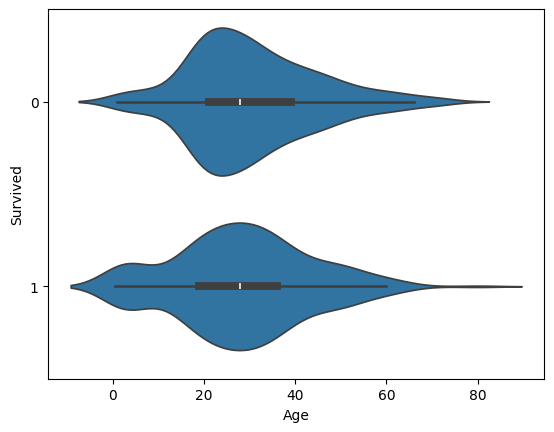

In [150]:
# 나이는 이미 숫자이긴 한데 1살 변한다고 생존 트렌드가 같이 변하는게 아니다 - 그냥 놔두지 말것
# 로지스틱 회귀는 선형관계 가정하는데 나이가 높아질수록 생존 확률이 꼭 선형으로 증가하는 것은 아니므로 딱 맞지 않음
# 하지만 카테고리화하면 비선형 패턴으로 이것을 피할 수 있음
# 나이 → 객실 → 생존 같은 간접 효과가 있는 경우에도, 나이 자체를 범주로 나누면 모델이 그룹별 특징을 더 쉽게 학습

# "이 나이대가 생존율이 낮아, 높아"라고 더 알기 쉽게 학습시키자
# 범주형으로 변경하자

import seaborn as sns

sns.violinplot(y = 'Survived', x = 'Age', data = train, orient = 'h') # 생존/죽음 카테고리별로 분포 비교하려고 바이올린 플랏

# 대략 20-30살 사이에서는 사망의 분포가 더 높고, 0세부터 10세까지는 생존의 분포가 더 높음. -> 정확한 나이 아니어도 됨

In [151]:
df.loc[df['Age']<=2,'Age'] =0
df.loc[(df['Age']>2) & (df['Age']<=15),'Age'] =1
df.loc[(df['Age']>15) & (df['Age']<=20),'Age'] =2
df.loc[(df['Age']>20) & (df['Age']<=33),'Age'] =3
df.loc[(df['Age']>33) & (df['Age']<=43),'Age'] =4
df.loc[(df['Age']>43) & (df['Age']<=60),'Age'] =5
df.loc[(df['Age']>60) & (df['Age']<=75),'Age'] =6
df.loc[(df['Age']>75),'Age'] =7

df['Age'].value_counts()

Age
3.0    662
4.0    204
5.0    154
2.0    133
1.0     89
0.0     34
6.0     31
7.0      2
Name: count, dtype: int64

<Axes: xlabel='Fare', ylabel='Survived'>

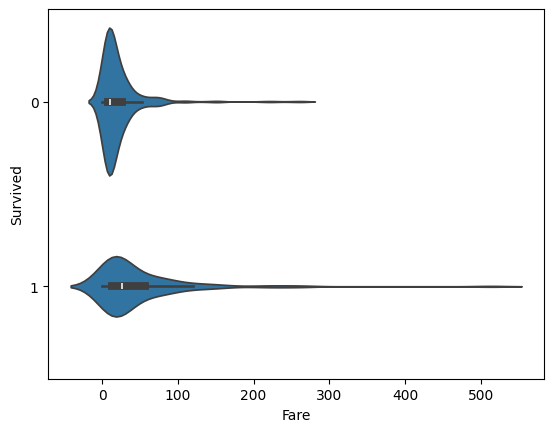

In [152]:
import seaborn as sns

sns.violinplot(data = train, y = 'Survived', x = 'Fare', orient = 'h')  
# df는 test 때문에 survived 에 결측값이 있어서 그대로는 쓸 수 없음. 

In [153]:
df['Fare'].isnull().sum()

# 결측치는 중간값으로 채우자
# 뱃삯은 Pclass에 정비례핳 것

df['Fare'] = df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'))

In [154]:
# sibsp + parch 합쳤을 때 더 생존률과 경향성이 보였음

df['Family'] = df['SibSp'] + df['Parch']

df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,name_title,Family
0,1,0.0,3,0,3.0,A/5 21171,7.2500,NaN,0,0.0,1
1,2,1.0,1,1,4.0,PC 17599,71.2833,C85,1,2.0,1
2,3,1.0,3,1,3.0,STON/O2. 3101282,7.9250,NaN,0,1.0,0
3,4,1.0,1,1,4.0,113803,53.1000,C123,0,2.0,1
4,5,0.0,3,0,4.0,373450,8.0500,NaN,0,0.0,0


1309


<Axes: >

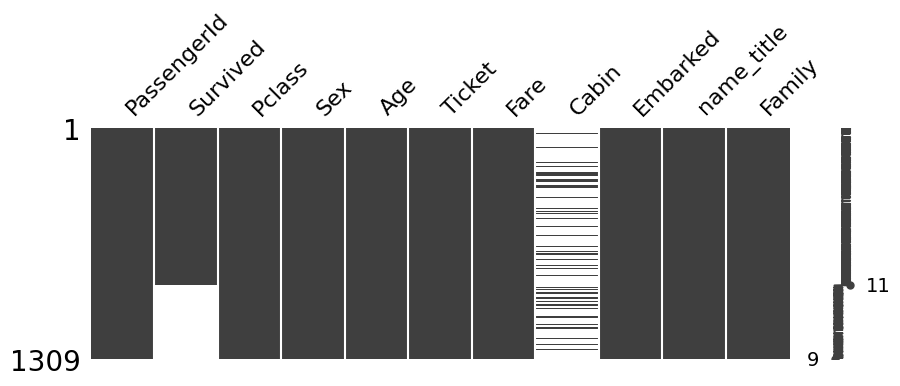

In [155]:
print(df['Cabin'].size)

df['Cabin'].isna().sum() # 1308개 중 1013개가 결측. 매우 많음
# 합리적 추론이 어려워보임

import missingno
missingno.matrix(df, figsize = (10,3))

In [156]:
df['Cabin'].unique() # 문자+숫자.

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [157]:
df['Cabin'] = df['Cabin'].fillna('U') # 임의 알파벳 할당

df['Cabin'] = df['Cabin'].str[0] # 기존 캐빈들은 첫 알파벳만 추출

df['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [158]:
df[df['Cabin']=='U']['Ticket'].value_counts() # 티켓은 어려워보임

Ticket
CA. 2343              11
1601                   8
CA 2144                8
347082                 7
S.O.C. 14879           7
                      ..
A/S 2816               1
SOTON/O.Q. 3101306     1
113792                 1
36209                  1
359309                 1
Name: count, Length: 767, dtype: int64

In [159]:
train = df[:n_train] # train만 뽑아
train

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,name_title,Family
0,1,0.0,3,0,3.0,A/5 21171,7.2500,U,0,0.0,1
1,2,1.0,1,1,4.0,PC 17599,71.2833,C,1,2.0,1
2,3,1.0,3,1,3.0,STON/O2. 3101282,7.9250,U,0,1.0,0
3,4,1.0,1,1,4.0,113803,53.1000,C,0,2.0,1
4,5,0.0,3,0,4.0,373450,8.0500,U,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,0,3.0,211536,13.0000,U,0,6.0,0
887,888,1.0,1,1,2.0,112053,30.0000,B,0,1.0,0
888,889,0.0,3,1,3.0,W./C. 6607,23.4500,U,0,1.0,3
889,890,1.0,1,0,3.0,111369,30.0000,C,1,0.0,0


In [160]:
import plotly.express as px

train_cabin = train.copy()

train_cabin['Results'] = train_cabin['Survived'].map({0: 'Dead', 1:'Survived'})

fig = px.histogram(
    train_cabin,
    x = 'Cabin',
    color = 'Results',
    barmode = 'overlay',
    title = 
    'Cabin distribution by surrival status'
)

fig.show()

In [161]:
# Cabin의 알파벳 값을 숫자로 매핑.

# 레이블 인코딩 - 문자열을 범주형 숫자값으로 변환

df['Cabin'] = df['Cabin'].factorize()[0]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,name_title,Family
0,1,0.0,3,0,3.0,A/5 21171,7.2500,0,0,0.0,1
1,2,1.0,1,1,4.0,PC 17599,71.2833,1,1,2.0,1
2,3,1.0,3,1,3.0,STON/O2. 3101282,7.9250,0,0,1.0,0
3,4,1.0,1,1,4.0,113803,53.1000,1,0,2.0,1
4,5,0.0,3,0,4.0,373450,8.0500,0,0,0.0,0


In [162]:
df['Ticket'].unique() # 매우 다양. 어떻게 그룹핑 하지?

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [163]:
df['Ticket_initial'] = df['Ticket'].str.extract('([^ \t\n\r\f\v]+) ') # .str: 칼럼의 각 행에 문자열 메소드 한번에 적용
                                                # map(lambda x: x.extract())보다 더 빠르고, NA 만나도 에러 안나서 좋음
df['Ticket_number'] = df['Ticket'].str.extract('( [^ \t\n\r\f\v]+)')
df.head() # 텍스트

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,name_title,Family,Ticket_initial,Ticket_number
0,1,0.0,3,0,3.0,A/5 21171,7.2500,0,0,0.0,1,A/5,21171
1,2,1.0,1,1,4.0,PC 17599,71.2833,1,1,2.0,1,PC,17599
2,3,1.0,3,1,3.0,STON/O2. 3101282,7.9250,0,0,1.0,0,STON/O2.,3101282
3,4,1.0,1,1,4.0,113803,53.1000,1,0,2.0,1,NaN,NaN
4,5,0.0,3,0,4.0,373450,8.0500,0,0,0.0,0,NaN,NaN


In [164]:
# 앞에 스페이스 없이 아예 숫자로만 이뤄진 ticket들은 ticket_number가 NA -> 메꿔줘야

df['Ticket_number'] = df['Ticket_number'].fillna(df['Ticket'])

In [165]:
df[df['Ticket_number']== 'LINE']

# ticket_number == 'LINE'인 row들은 이걸 ticket_initial로 옮기고 ticket_number는 0으로 두는게 맞을듯

df.loc[(df['Ticket_number']=='LINE'), 'Ticket_initial'] = 'LINE' # number = 'LINE'인 줄의 initial에 LINE 삽입
df.loc[(df['Ticket_number']=='LINE'), 'Ticket_number'] = 0 # 위 row들의 number는 0 삽입

df[df['Ticket_initial']== 'LINE']

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,name_title,Family,Ticket_initial,Ticket_number
179,180,0.0,3,0,4.0,LINE,0.0,0,0,0.0,0,LINE,0
271,272,1.0,3,0,3.0,LINE,0.0,0,0,0.0,0,LINE,0
302,303,0.0,3,0,2.0,LINE,0.0,0,0,0.0,0,LINE,0
597,598,0.0,3,0,5.0,LINE,0.0,0,0,0.0,0,LINE,0


In [166]:
df[df['Ticket_number']==' Basle'] # 3 부분으로 나눠져있음

df.loc[(df['Ticket_number']== ' Basle'), 'Ticket_number'] = 541 # 티켓 중 숫자 부분인 541만 ticket number에 삽입

In [167]:
# 동일해 보이는 값들도 특수문자가 들어가 있었음 (A/5 != A./5.) -> 아예 특수문자 없애자

df['Ticket_initial'] = df['Ticket_initial'].str.replace(pat = '[^A-Za-z]', repl = '', regex = True)

In [168]:
# 티켓 앞글자가 너무 긴 것들이 있으니 앞에서 두글자 까지만 갖자 

df['Ticket_initial_2'] = df['Ticket_initial'].str.replace(pat = '[^A-Za-z]', repl = '', regex = True).str[0:2]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,name_title,Family,Ticket_initial,Ticket_number,Ticket_initial_2
0,1,0.0,3,0,3.0,A/5 21171,7.2500,0,0,0.0,1,A,21171,A
1,2,1.0,1,1,4.0,PC 17599,71.2833,1,1,2.0,1,PC,17599,PC
2,3,1.0,3,1,3.0,STON/O2. 3101282,7.9250,0,0,1.0,0,STONO,3101282,ST
3,4,1.0,1,1,4.0,113803,53.1000,1,0,2.0,1,NaN,113803,NaN
4,5,0.0,3,0,4.0,373450,8.0500,0,0,0.0,0,NaN,373450,NaN


In [169]:
ntrain = 891
train = df[:ntrain]

In [170]:
train_ticket = train.copy()

train_ticket['Results'] = train_ticket['Survived'].map({0: 'Dead', 1:'Survived'})

fig = px.histogram(
    train_ticket,
    x = 'Ticket_initial_2',
    color = 'Results',
    barmode = 'overlay',
    title = 
    'Ticket Initial 2 distribution by surrival status'
)

fig.show()

In [171]:
df['Ticket_initial_2'].isnull().sum() # null이 너무 많아

np.int64(957)

In [172]:
df['Ticket_initial_2'] = df['Ticket_initial_2'].fillna('UN')    # 임의로 값 넣자
train = df[:ntrain]

# 다시 돌림

train_ticket = train.copy()

train_ticket['Results'] = train_ticket['Survived'].map({0: 'Dead', 1:'Survived'})

fig = px.histogram(
    train_ticket,
    x = 'Ticket_initial_2',
    color = 'Results',
    barmode = 'overlay',
    title = 
    'Ticket Initial 2 distribution by surrival status'
)

fig.show()

In [173]:
# 레이블 인코딩 - 문자열을 범주형 숫자값으로 변환

df['Ticket_initial_2'] = df['Ticket_initial_2'].factorize()[0]

# 사이킷런 라이브러리에서도 비슷한 기능 있음
# 숫자가 크다고 더 강한 트렌드라고 모델이 잘못 의미를 부여할 수 있음 -> 레이블 인코딩 안맞음
# 생존률 높은 아기가 0, 사망률 높은 청년이 3이었던것처럼, 숫자의 크고 작음에 민감한 모델의 경우 단순 범주 이상으로 해석할 수 있음 -> 원핫 인코딩 필요

In [174]:
# ticket number도 아주 가지각색. 자릿수가 5자리부터 8자리까지 다양한 숫자들
# 이걸 범위별로 나눠보자

df['Ticket_number_cut'] = df['Ticket_number'].astype('float') # object니 float으로 바꿔야
df['Ticket_number_cut'] = pd.qcut(df['Ticket_number_cut'], q = 10, labels = False)  # 10등분
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,name_title,Family,Ticket_initial,Ticket_number,Ticket_initial_2,Ticket_number_cut
0,1,0.0,3,0,3.0,A/5 21171,7.2500,0,0,0.0,1,A,21171,0,3
1,2,1.0,1,1,4.0,PC 17599,71.2833,1,1,2.0,1,PC,17599,1,3
2,3,1.0,3,1,3.0,STON/O2. 3101282,7.9250,0,0,1.0,0,STONO,3101282,2,9
3,4,1.0,1,1,4.0,113803,53.1000,1,0,2.0,1,NaN,113803,3,5
4,5,0.0,3,0,4.0,373450,8.0500,0,0,0.0,0,NaN,373450,3,9


In [175]:
ntrain = 891
train = df[:ntrain]

train_ticket_cut = train.copy()

train_ticket_cut['Results'] = train_ticket_cut['Survived'].map({0: 'Dead', 1:'Survived'})

fig = px.histogram(
    train_ticket_cut,
    x = 'Ticket_number_cut',
    color = 'Results',
    barmode = 'overlay',
    title = 
    'Ticket Number cut distribution by surrival status'
)

fig.show()

In [176]:
df_initial = df.copy()
df_initial['Results'] = df_initial['Survived'].map({0: 'Dead', 1:'Survived'})

fig = px.histogram(
    df_initial,
    x = 'name_title',
    color = 'Results',
    barmode = 'overlay',
    title = 
    'Title distribution by surrival status'
)

title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Lady':4, 
                 'Don':5, 'Rev':6, 'Dr':7, 'Major':8, 'Sir':9, 'Col':10,
                 'Capt':11, 'Jonkheer':12}

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(title_mapping.values()),
        ticktext = list(title_mapping.keys())
    )
)

fig.show()

In [177]:
df_pclass = df.copy()
df_pclass['Results'] = df_pclass['Survived'].map({0: 'Dead', 1:'Survived'})

fig = px.histogram(
    df_pclass,
    x = 'Pclass',
    color = 'Results',
    barmode = 'overlay',
    title = 
    'PClass distribution by surrival status'
)

fig.update_xaxes(
    type = 'category',
    categoryorder = 'array',
    categoryarray = [1,2,3]
)


fig.show()

In [178]:
df_age = df.copy()
df_age['Results'] = df_age['Survived'].map({0: 'Dead', 1:'Survived'})

fig = px.histogram(
    df_age,
    x = 'Age',
    color = 'Results',
    barmode = 'overlay',
    title = 
    'Age distribution by surrival status'
)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1,2,3,4,5,6,7],
        ticktext = ['<=2', '2-15', '15-20', '20-33', '33-43', '43-60', '60-75', '>75']
    )
)

fig.show()

In [179]:
# 전처리 steps

# EDA 로 데이터 이해 & 예측할 피쳐와의 관계 파악
# 결측치, 문자 데이터 없어야 -> 결측치 제거보다 최대한 활용 위해 보완. 문자는 숫자 범주형 값으로 변환. 연속형 숫자 데이터도 경향성 보이는 범주형 숫자 그룹으로 변환
# 연관 있을 피쳐들 조합해서 또다른 features 만들기도 함
# 원핫 인코딩 / 레이블 인코딩

In [180]:
# 생존 가능성 높은 그룹들만 모아서 high chance feature 만들기

df['HighChance'] = 0
df.loc[(df['Pclass']<3) & (df['Age']<2) & (df['Sex']==1), 'HighChance'] = 6
df.loc[(df['name_title']==4, 'HighChance')] =5 
df.loc[(df['Pclass']<3) & (df['Age']==2) & (df['Sex']==1), 'HighChance'] = 4
df.loc[(df['Pclass']== 1 & (df['name_title']==1), 'HighChance')] =3
df.loc[(df['Pclass']== 1 & (df['name_title']==2), 'HighChance')] =2
df.loc[(df['Age']==0, 'HighChance')] =1

In [181]:
ntrain = 891
train = df[:ntrain]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,name_title,Family,Ticket_initial,Ticket_number,Ticket_initial_2,Ticket_number_cut,HighChance
0,1,0.0,3,0,3.0,A/5 21171,7.2500,0,0,0.0,1,A,21171,0,3,0
1,2,1.0,1,1,4.0,PC 17599,71.2833,1,1,2.0,1,PC,17599,1,3,2
2,3,1.0,3,1,3.0,STON/O2. 3101282,7.9250,0,0,1.0,0,STONO,3101282,2,9,0
3,4,1.0,1,1,4.0,113803,53.1000,1,0,2.0,1,NaN,113803,3,5,2
4,5,0.0,3,0,4.0,373450,8.0500,0,0,0.0,0,NaN,373450,3,9,0


In [182]:
import plotly.express as px

train_high = train.copy()

train_high['Results'] = train_high['Survived'].map({0: 'Dead', 1:'Survived'})

fig = px.histogram(
    train_high,
    x = 'HighChance',
    color = 'Results',
    barmode = 'overlay',
    title = 
    'High Chance distribution by surrival status'
)

fig.show()

In [183]:
# Low chance group 만들기

df['LowChance'] = 0
df.loc[(df['Sex']==0) & (df['Family']==1), 'LowChance'] = 1
df.loc[(df['Sex']==0) & (df['Family']==1) & (df['Pclass']==3), 'LowChance'] = 2

In [184]:
ntrain = 891
train = df[:ntrain]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,name_title,Family,Ticket_initial,Ticket_number,Ticket_initial_2,Ticket_number_cut,HighChance,LowChance
0,1,0.0,3,0,3.0,A/5 21171,7.2500,0,0,0.0,1,A,21171,0,3,0,2
1,2,1.0,1,1,4.0,PC 17599,71.2833,1,1,2.0,1,PC,17599,1,3,2,0
2,3,1.0,3,1,3.0,STON/O2. 3101282,7.9250,0,0,1.0,0,STONO,3101282,2,9,0,0
3,4,1.0,1,1,4.0,113803,53.1000,1,0,2.0,1,NaN,113803,3,5,2,0
4,5,0.0,3,0,4.0,373450,8.0500,0,0,0.0,0,NaN,373450,3,9,0,0


In [185]:
import plotly.express as px

train_low = train.copy()

train_low['Results'] = train_low['Survived'].map({0: 'Dead', 1:'Survived'})

fig = px.histogram(
    train_low,
    x = 'LowChance',
    color = 'Results',
    barmode = 'overlay',
    title = 
    'Low Chance distribution by surrival status'
)

fig.show()

In [186]:
# 원핫 인코딩/ 레이블 인코딩

df_label = df.copy()
df_onehot = df.copy()

ntrain = 891
train = df[:ntrain]
y_train = train[['Survived']].copy() # train 의 정답 컬럼만 뽑음

# X_train: 학습용 입력 데이터 (features)
# X_test: 테스트용 입력 데이터 (features)
# Y_train: 학습용 정답 컬럼 (target)
# Y_test: 테스트용 정답 컬럼 (target)

y_train.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [187]:
drop_features = ['PassengerId', 'Survived'] # 정답 survived는 원핫 인코딩으로 다른 값으로 변환하면 안되니까 
                                             # 승객ID는 ML모델 만들때 안쓰니 변환 안할거야
df_label = df_label.drop(drop_features, axis =1).copy()
df_onehot = df_onehot.drop(drop_features, axis =1).copy()

df_onehot.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,name_title,Family,Ticket_initial,Ticket_number,Ticket_initial_2,Ticket_number_cut,HighChance,LowChance
0,3,0,3.0,A/5 21171,7.2500,0,0,0.0,1,A,21171,0,3,0,2
1,1,1,4.0,PC 17599,71.2833,1,1,2.0,1,PC,17599,1,3,2,0
2,3,1,3.0,STON/O2. 3101282,7.9250,0,0,1.0,0,STONO,3101282,2,9,0,0
3,1,1,4.0,113803,53.1000,1,0,2.0,1,NaN,113803,3,5,2,0
4,3,0,4.0,373450,8.0500,0,0,0.0,0,NaN,373450,3,9,0,0


In [190]:
df_label.dtypes

Pclass                 int64
Sex                    int64
Age                  float64
Ticket                object
Fare                 float64
Cabin                  int64
Embarked               int64
name_title           float64
Family                 int64
Ticket_initial        object
Ticket_number         object
Ticket_initial_2       int64
Ticket_number_cut      int64
HighChance             int64
LowChance              int64
dtype: object

In [245]:
# 레이블 인코딩 (사용법만. 위에서 거의 다 했음)
# object, category 칼럼만 적용
 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

# df_label = df_label.apply(LabelEncoder().fit_transform)
# df_label.head()

In [192]:
#원핫 인코딩

onehot_cols=df_label.columns.tolist()
df_onehot = pd.get_dummies(df_label, columns = onehot_cols)

df_onehot.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,...,HighChance_0,HighChance_1,HighChance_2,HighChance_3,HighChance_4,HighChance_5,HighChance_6,LowChance_0,LowChance_1,LowChance_2
0,False,False,True,True,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
1,True,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
2,False,False,True,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
3,True,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
4,False,False,True,True,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False


In [193]:
# 학습 데이터, 테스트 데이터 분리

n_train = 891
X_train, X_test = df_onehot[:ntrain], df_onehot[ntrain:] # 처음 891개만 학습, 이후는 테스트 용도

X_train.head() # 컬럼 93개 너무 많아짐. 예측 기여도 적은 피쳐 있으니 모델 성능 떨어질 수 있음 -> 
# 전체 피쳐 다 넣지 말고, 중요도 높은 피쳐들로만 데이터셋 만들고 그걸로만 예측 시키자 

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,...,HighChance_0,HighChance_1,HighChance_2,HighChance_3,HighChance_4,HighChance_5,HighChance_6,LowChance_0,LowChance_1,LowChance_2
0,False,False,True,True,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
1,True,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
2,False,False,True,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
3,True,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
4,False,False,True,True,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False


In [194]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 13)
k_fold = KFold(n_splits = 10, shuffle=True, random_state = 42)

score = cross_val_score(knn, X_train, y_train, cv= k_fold, n_jobs = -1, scoring = 'accuracy')
score

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:239: 

array([0.83333333, 0.76404494, 0.7752809 , 0.71910112, 0.84269663,
       0.88764045, 0.80898876, 0.78651685, 0.76404494, 0.93258427])

In [195]:
import numpy as np
np.mean(score) * 100

np.float64(81.14232209737825)

In [196]:
# stratified K-fold

import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

iris_data = load_iris()

In [ ]:
dir(iris_data)

# 실제 데이터는 iris_data.data에 , 피쳐는 feature_names에 포함됨

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [197]:
iris_df = pd.DataFrame(data=iris_data.data, columns = iris_data.feature_names)

iris_df['species'] = iris_data.target
iris_df['species'].value_counts() # 정답 컬럼. 붓꽃 종류 3가지

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [198]:
# stratified k-fold

skfold = StratifiedKFold(n_splits= 3)

for train_index, test_index in skfold.split(iris_df, iris_df['species']): # .split(데이터셋, 정답 칼럼) - 인덱스 번호 가져옴
    # 3개로 나눈 것 중 2개는 학습용, 1개는 검증용 -> 3번 iterate. 
    # stratified 는 정답간 분포를 맞추는게 중요하므로 .split 인자로 정답 칼럼 넣음 (아래 일반 kfold는 정답 칼럼 안넣음)

    trainset = iris_df['species'].iloc[train_index]
    testset = iris_df['species'].iloc[test_index]
    print('train set\n', trainset.value_counts()) # test, train셋의 species별 갯수 확인. species간 분포 1:1:1로 일정함
    print('test set\n', testset.value_counts())

train set
 species
2    34
0    33
1    33
Name: count, dtype: int64
test set
 species
0    17
1    17
2    16
Name: count, dtype: int64
train set
 species
1    34
0    33
2    33
Name: count, dtype: int64
test set
 species
0    17
2    17
1    16
Name: count, dtype: int64
train set
 species
0    34
1    33
2    33
Name: count, dtype: int64
test set
 species
1    17
2    17
0    16
Name: count, dtype: int64


In [199]:
# k-fold 분포 확인

kfold = KFold(n_splits= 3)

for train_index, test_index in kfold.split(iris_df): # 정답 칼럼 안넣음.
    # 3개로 나눈 것 중 2개는 학습용, 1개는 검증용 -> 3번 iterate
    trainset = iris_df['species'].iloc[train_index]
    testset = iris_df['species'].iloc[test_index]
    print('train set\n', trainset.value_counts())
    print('test set\n', testset.value_counts())

train set
 species
1    50
2    50
Name: count, dtype: int64
test set
 species
0    50
Name: count, dtype: int64
train set
 species
0    50
2    50
Name: count, dtype: int64
test set
 species
1    50
Name: count, dtype: int64
train set
 species
0    50
1    50
Name: count, dtype: int64
test set
 species
2    50
Name: count, dtype: int64


In [ ]:
# 원핫 이후로 피쳐 컬럼 93개 너무 많아짐. 예측 기여도 적은 피쳐 있으니 모델 성능 떨어질 수 있음 -> 
# 전체 피쳐 다 넣지 말고, 중요도 높은 피쳐들로만 데이터셋 만들고 그걸로만 학습/예측 시키자 
# 피쳐 중요도 알려주는 알고리즘들이 있음

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
# import xgboost
# import lightgbm
 

In [ ]:
# 함수 정리

# fit(학습용 피쳐들, 학습용 정답 칼럼) 학습시키고 피쳐 중요도 뽑아냄 
# predict(테스트용 피쳐들)
# score(학습용 피쳐, 테스트용 피쳐)와 score(학습용 정답 칼럼, 테스트용 정답 칼럼) 비교하면 과적합 정도 알 수 있음
# cross_val_score(모델, ) k-fold 와 연계해 복수의 데이터셋에서 평가했을 떄 성능 

In [201]:
logreg_model = LogisticRegression()
svc_model = SVC()
decision_model = DecisionTreeClassifier()
random_model= RandomForestClassifier()
extra_model = ExtraTreesClassifier()
gbm_model = GradientBoostingClassifier()
nb_model = GaussianNB()

results = dict()

In [203]:
alg = logreg_model # 
alg.fit(X_train, y_train) # 학습용 피쳐들을 학습용 정답 칼럼과 비교
train_accuracy = alg.score(X_train, y_train) # 답지 보고 배운 다음 똑같은 문제로 다시 평가하니 점수 높을 수밖에 없음
results[alg.__class__.__name__] = train_accuracy * 100 # key: 알고리즘 이름 value: 점수

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [204]:
alg = svc_model # 
alg.fit(X_train, y_train) # 학습용 피쳐들을 학습용 정답 칼럼과 비교
train_accuracy = alg.score(X_train, y_train) # 답지 보고 배운 다음 똑같은 문제로 다시 평가하니 점수 높을 수밖에 없음
results[alg.__class__.__name__] = train_accuracy * 100

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [205]:
alg = decision_model # 
alg.fit(X_train, y_train) # 학습용 피쳐들을 학습용 정답 칼럼과 비교
train_accuracy = alg.score(X_train, y_train) # 답지 보고 배운 다음 똑같은 문제로 다시 평가하니 점수 높을 수밖에 없음
results[alg.__class__.__name__] = train_accuracy * 100

In [206]:
alg = random_model # 
alg.fit(X_train, y_train) # 학습용 피쳐들을 학습용 정답 칼럼과 비교
train_accuracy = alg.score(X_train, y_train) # 답지 보고 배운 다음 똑같은 문제로 다시 평가하니 점수 높을 수밖에 없음
results[alg.__class__.__name__] = train_accuracy * 100

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [207]:
alg = extra_model # 
alg.fit(X_train, y_train) # 학습용 피쳐들을 학습용 정답 칼럼과 비교
train_accuracy = alg.score(X_train, y_train) # 답지 보고 배운 다음 똑같은 문제로 다시 평가하니 점수 높을 수밖에 없음
results[alg.__class__.__name__] = train_accuracy * 100

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [208]:
alg = gbm_model # 
alg.fit(X_train, y_train) # 학습용 피쳐들을 학습용 정답 칼럼과 비교
train_accuracy = alg.score(X_train, y_train) # 답지 보고 배운 다음 똑같은 문제로 다시 평가하니 점수 높을 수밖에 없음
results[alg.__class__.__name__] = train_accuracy * 100

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [211]:
alg = nb_model # 
alg.fit(X_train, y_train) # 학습용 피쳐들을 학습용 정답 칼럼과 비교
train_accuracy = alg.score(X_train, y_train) # 답지 보고 배운 다음 똑같은 문제로 다시 평가하니 점수 높을 수밖에 없음
results[alg.__class__.__name__] = train_accuracy * 100

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [212]:
# 모델간 성능 비교

sorted(results.items(), key = lambda x: x[1], reverse= True) # x: 각 데이터 1번: 점수 성능

[('DecisionTreeClassifier', 99.66329966329967),
 ('RandomForestClassifier', 99.66329966329967),
 ('ExtraTreesClassifier', 99.66329966329967),
 ('LogisticRegression', 94.72502805836139),
 ('GaussianNB', 94.05162738496072),
 ('SVC', 89.11335578002245),
 ('GradientBoostingClassifier', 87.99102132435466)]

In [213]:
# 트리 관련 모델만 빼서 중요도 비교

tree_models= [
    decision_model,
    random_model,
    extra_model,
    gbm_model
    # , xgb_model
]

In [214]:
for alg in tree_models:
    try:
        print(alg.__class__.__name__)
        print(alg.feature_importances_)
    except:
        print(alg.__class__.__name__, 'X')
# 90 + 개 컬럼별 피쳐 중요도 다 나옴

DecisionTreeClassifier
[0.         0.         0.07070015 ... 0.         0.         0.        ]
RandomForestClassifier
[0.00893898 0.00721946 0.0256456  ... 0.00528268 0.00244882 0.00119463]
ExtraTreesClassifier
[0.01209797 0.00762951 0.02022451 ... 0.0036213  0.0029769  0.00124434]
GradientBoostingClassifier
[7.50239759e-03 6.04615730e-06 1.00954519e-01 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [215]:
decision_model_importance = pd.DataFrame({'Feature': X_train.columns, 'decision_model':decision_model.feature_importances_})
random_model_importance = pd.DataFrame({'Feature': X_train.columns, 'random_model':random_model.feature_importances_})
extra_model_importance = pd.DataFrame({'Feature': X_train.columns, 'extra_model':extra_model.feature_importances_})
gbm_model_importance = pd.DataFrame({'Feature': X_train.columns, 'gbm_model':gbm_model.feature_importances_})
# xgb_model_importance = pd.DataFrame({'Feature': X_train.columns, 'xgb_model':xgb_model.feature_importances_})

In [216]:
data_frames = [
    decision_model_importance,
    random_model_importance,
    extra_model_importance,
    gbm_model_importance
    # , xgb_model_importance
]

from functools import reduce

importances = reduce(lambda left, right: pd.merge(left, right, on = 'Feature'), data_frames)
# (decision_model_importance + random_model_importance) + extra_model... 같이 하나씩 누적되며 남은 값이 적어져간다
importances.head()

,Feature,decision_model,random_model,extra_model,gbm_model
0,Pclass_1,0.000000,0.008939,0.012098,0.007502
1,Pclass_2,0.000000,0.007219,0.007630,0.000006
2,Pclass_3,0.070700,0.025646,0.020225,0.100955
3,Sex_0,0.000000,0.062904,0.064323,0.077334
4,Sex_1,0.009285,0.046685,0.055316,0.105210


In [217]:
numeric_columns = importances.select_dtypes(include=[np.number]) # 수치형만 선택
importances['avg'] = numeric_columns.mean(axis=1)
importances = importances[['Feature', 'avg']]

importances = importances.sort_values(by='avg', ascending=False)

importances.head()

,Feature,avg
1235,name_title_0.0,0.175758
2,Pclass_3,0.054381
4,Sex_1,0.054124
3,Sex_0,0.051140
1223,Cabin_0,0.024284


In [218]:
# 상위 50개만 가져오기

importances = importances[:50]

train_importances = X_train[importances['Feature'].tolist()] # 학습용 피쳐
test_importances = X_test[importances['Feature'].tolist()] # 테스트용 피쳐

train_importances.head()

,name_title_0.0,Pclass_3,Sex_1,Sex_0,Cabin_0,HighChance_0,Embarked_0,name_title_1.0,name_title_3.0,Ticket_number_cut_2,...,Ticket_number_ 2.,Embarked_2,Fare_56.4958,Ticket_initial_PC,Ticket_initial_SWPP,Ticket_STON/O 2. 3101286,Ticket_number_244270,Cabin_4,Ticket_1601,Ticket_number_cut_4
0,True,True,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,True,True,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [219]:
# 중요도 높은 것만 뽑아서 다시 돌리기

logreg_model = LogisticRegression()
svc_model = SVC()
decision_model = DecisionTreeClassifier()
random_model= RandomForestClassifier()
extra_model = ExtraTreesClassifier()
gbm_model = GradientBoostingClassifier()
nb_model = GaussianNB()

results = dict()

In [221]:
alg = logreg_model # 
alg.fit(train_importances, y_train) # 학습용 피쳐들을 학습용 정답 칼럼과 비교
train_accuracy = alg.score(train_importances, y_train) # 답지 보고 배운 다음 똑같은 문제로 다시 평가하니 점수 높을 수밖에 없음
results[alg.__class__.__name__] = train_accuracy * 100 # key: 알고리즘 이름 value: 점수

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
alg = svc_model 
alg.fit(train_importances, y_train) # 학습용 피쳐들을 학습용 정답 칼럼과 비교
train_accuracy = alg.score(train_importances, y_train) # 답지 보고 배운 다음 똑같은 문제로 다시 평가하니 점수 높을 수밖에 없음
results[alg.__class__.__name__] = train_accuracy * 100 # key: 알고리즘 이름 value: 점수

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [222]:
alg = random_model # 
alg.fit(train_importances, y_train) # 학습용 피쳐들을 학습용 정답 칼럼과 비교
train_accuracy = alg.score(train_importances, y_train) # 답지 보고 배운 다음 똑같은 문제로 다시 평가하니 점수 높을 수밖에 없음
results[alg.__class__.__name__] = train_accuracy * 100 # key: 알고리즘 이름 value: 점수

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [223]:
alg = extra_model # 
alg.fit(train_importances, y_train) # 학습용 피쳐들을 학습용 정답 칼럼과 비교
train_accuracy = alg.score(train_importances, y_train) # 답지 보고 배운 다음 똑같은 문제로 다시 평가하니 점수 높을 수밖에 없음
results[alg.__class__.__name__] = train_accuracy * 100 # key: 알고리즘 이름 value: 점수

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
alg = gbm_model 
alg.fit(train_importances, y_train) # 학습용 피쳐들을 학습용 정답 칼럼과 비교
train_accuracy = alg.score(train_importances, y_train) # 답지 보고 배운 다음 똑같은 문제로 다시 평가하니 점수 높을 수밖에 없음
results[alg.__class__.__name__] = train_accuracy * 100 # key: 알고리즘 이름 value: 점수

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
alg = nb_model 
alg.fit(train_importances, y_train) # 학습용 피쳐들을 학습용 정답 칼럼과 비교
train_accuracy = alg.score(train_importances, y_train) # 답지 보고 배운 다음 똑같은 문제로 다시 평가하니 점수 높을 수밖에 없음
results[alg.__class__.__name__] = train_accuracy * 100 # key: 알고리즘 이름 value: 점수

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [226]:
sorted(results.items(), key = lambda x: x[1], reverse= True) 

[('RandomForestClassifier', 93.26599326599326),
 ('ExtraTreesClassifier', 93.26599326599326),
 ('GradientBoostingClassifier', 89.337822671156),
 ('SVC', 87.87878787878788),
 ('LogisticRegression', 85.85858585858585),
 ('GaussianNB', 78.22671156004489)]

In [ ]:
# hyper parameter tuning

# randomised search + SVC

from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 랜덤서치, 그리드 서치 등 서치 툴은 모델에 독립적이므로 어떤 알고리즘과도 결합 가능

# 알고리즘 자체의 파라미터
# 서치 툴은 알고리즘이 제공한 파라미터에서 랜덤으로 값 뽑아서 돌려주는 역할

hyperparams ={
    "C": stats.uniform(0,50), 
    'gamma': stats.uniform(0.1)
}

# 
gd= RandomizedSearchCV(
    estimator = SVC(random_state= 42),
    param_distributions = hyperparams, # 사전 파라미터 범위 데이터 삽입
    n_iter = 100, # 몇번 테스트?
    cv= 5, # 한번 테스트 할때마다 데이터셋 K-fold 몇개로 분리?
    scoring = 'accuracy',
    random_state = 42,
    n_jobs= -1 # CPU 최대한 활용
)

gd.fit(train_importances, y_train)
print(gd.best_score_) # 최적의 파라미터로 테스트했을 때 몇점인가
print(gd.best_params_) # 그 때의 파라미터 값은?

df = pd.DataFrame(gd.cv_results_)
print(df[['params', 'mean_test_score']])

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataC

0.8473730462620048
{'C': np.float64(1.2709563372047594), 'gamma': np.float64(0.20789142699330446)}
                                               params  mean_test_score
0   {'C': 18.727005942368123, 'gamma': 1.050714306...         0.832798
1   {'C': 36.59969709057025, 'gamma': 0.6986584841...         0.831668
2   {'C': 7.800932022121826, 'gamma': 0.2559945203...         0.833940
3   {'C': 2.9041806084099733, 'gamma': 0.966176145...         0.832791
4   {'C': 30.05575058716044, 'gamma': 0.8080725777...         0.831674
..                                                ...              ...
95  {'C': 4.655138390294961, 'gamma': 0.9972157579...         0.835032
96  {'C': 45.02090285816652, 'gamma': 0.7331014572...         0.833915
97  {'C': 16.951489552435035, 'gamma': 0.449209574...         0.829433
98  {'C': 36.297783943511966, 'gamma': 0.997110259...         0.835032
99  {'C': 44.354321213255865, 'gamma': 0.879875545...         0.832798

[100 rows x 2 columns]


/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# SVC + grid search

hyperparams = {
    "C":[10,15,20,23,30,50],
    'gamma' : [0.001, 0.01, 0.05, 0.06, 0.07, 0.1]
}

gd  = GridSearchCV(
    estimator = SVC(random_state = 42),
    param_grid=hyperparams,
    verbose = True, # 중간 진행 상황을 출력하라
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

gd.fit(train_importances, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataC

0.8608310840499656
{'C': 30, 'gamma': 0.05}


/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataC

In [ ]:
# gradient boosting classifier + GridSearchCV

learning_rate = [0.01, 0.05, 0.1, 0.2] # 이 숫자를 자주 씀
n_estimators = [100,1000,2000] # 몇개의 모델을 통과할 것인가
max_depth = [3,5,10,15]

hyperparams = {
    'learning_rate':learning_rate,
    'n_estimators':n_estimators,
    'max_depth' : max_depth
}

gd = GridSearchCV(
    estimator = GradientBoostingClassifier(random_state = 42),
    param_grid= hyperparams,
    verbose= True,
    cv= 5,
    scoring = 'accuracy',
    n_jobs = -1
)

gd.fit(train_importances, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/preprocessing/_label.p

0.8541208963655766
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



''

In [253]:
# logistic regression + Randomized SEarch CV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


hyperparms = [
    {'penalty': ['l1'], 'solver': ['liblinear'], 'C': stats.uniform(0.01, 100)},
  {'penalty': ['l2'], 'solver': ['lbfgs'], 'C': stats.uniform(0.01, 100)},
  {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': stats.uniform(0,1), 'C': stats.uniform(0.01, 100)}
]

    # 'penalty': ['l1','l2', 'elasticnet'],
    # 'C': stats.uniform(0,1000)


gd = RandomizedSearchCV(
    estimator = LogisticRegression(random_state = 42),
    param_distributions = hyperparams,
    n_iter = 100,
    cv=5,
    scoring = 'accuracy',
    random_state = 42,
    n_jobs = -1
)

gd.fit(train_importances, y_train)
print(gd.best_score_)
print(gd.best_params_)

/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.



ValueError: Invalid parameter 'n_estimators' for estimator LogisticRegression(random_state=42). Valid parameters are: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'].

In [254]:
# logistic regression + grid search

penalty = ['l1', 'l2']
C = np.linspace(700,900,200) # 값 갯수가 많을 때 하나하나 적기 부담스러울 때

hyperparams = {
    'penalty': penalty,
    "C":C
}

gd = GridSearchCV(
    estimator = LogisticRegression(random_state = 42),
    param_grid = hyperparams,
    verbose= True,
    cv= 5,
    scoring = 'accuracy',
    n_jobs = -1
)

gd.fit(train_importances, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/miji.lee/Desktop/ML Practice/.venv_ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataC

0.844002259745151
{'C': np.float64(700.0), 'penalty': 'l2'}


In [ ]:
# bayesian ooptimisation + xg boost

# from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization

pbounds = {
    'learning_rate': (0.01, 0.5), # 
    'n_estimators' : (100, 1000),
    'max_depth': (3,10),
    'min_child_weight': (0,10),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'gamma': (0,5)
    # 'reg_lambda':(0,1000, 'log-uniform'),
    # 'reg_alpha': (0,1.0, 'log-uniform')
}

def xgboost_hyper_param(learning_rate, n_estimators, max_depth, min_child_weight, subsample, colsample_bytree, gamma):
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    clf = XGVClassifier(
        max_depth= max_depth,
        min_child_weight = min_child_weight,
        learning_rate = learning_rate,
        n_estimators = n_estimators,
        subsample = subsample,
        colsample_bytree = colsample_bytree,
        gamma = gamma,
        random_state = 42,
        eval_metric = 'logloss'
        # , reg_alpha = reg_alpha
        # , reg_lambda = reg_lambda
    )
    return np.mean(cross_val_score(clf, train_importances, y_train, cv=5, scoring = 'accuracy'))

optimizer = BayesianOptimization(f = xgboost_hyper_param, pbounds=pbounds, random_state=42)
# optimizer.maximize(init_points=10, n_iter=100, acq = 'ei', xi = 0.01)
optimizer.maximize(init_points=10, n_iter = 100)

In [ ]:
# Bayesian optimisation + lightGBM

pbounds = {
    'learning_rate' :(0.01, 0.5),
    'n_estimators' : (100, 1000),
    'max_depth' : (3,10),
    'min_child_weight': (0,10),
    'subsample': (0.5, 1.0),
    'colsample_bytree' :(0.5, 1.0)
}

def lgbm_hyper_param(learning_rate, n_estimators, max_depth, min_child_weight, subsample, colsample_bytree):
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    clf = LGBMClassifier(
        max_depth = max_depth,
        min_child_weight = min_child_weight,
        learning_rate = learning_rate,
        n_estimators = n_estimators,
        subsample = subsample,
        colsample_bytree = colsample_bytree
    )
    return 

In [ ]:
# Grid search + XGBoost

# step 1

learning_rate = [0.001, 0.005, 0.01, 0.05, 0.06, 0.1, 0.12, 0.15, 0.17, 0.2]
n_estimators = [10,50,60,75,85, 100, 125, 150, 200, 250, 500, 1000]

hyperparams = {
    'learning_rate':learning_rate,
    'n_estimators':n_estimators
}

gd = GridSearchCV(
    estimator= XGBClassifier(random_state = 42, eval_metric = 'logloss'),
    param_grid=hyperparams,
    verbose=True,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

gd.fit(train_importances, y_train)
print(gd.best_score_)
print(gd.best_params_)

In [ ]:
# step 2

max_depth = [3,4,5,6,7,8,9,10]
min_child_weight = [1,2,3,4,5,6,7]

hyperparams = {
    'max_depth':max_depth,
    'min_child_weight': min_child_weight
}

gd = GridSearchCV(
    estimator= XGBClassifier(learning_rate=0.1, n_estimators=200, random_state = 42, eval_metric= 'logloss'),
    param_grid=hyperparams,
    verbose=True,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1    
)

gd.fit(train_importances, y_train)
print(gd.best_score_)
print(gd.best_params_)

In [ ]:
# step 3

gamma = [i*0.1 for i in range(0,5)]
subsample = [0.6, 0.65, 0.7, 0.75,0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
reg_alpha = [1e-5, 1e-2, 0.1, 1,100]

hyperparams = {
    'gamma':gamma,
    'reg_alpha': reg_alpha
}

gd = GridSearchCV(
    estimator= XGBClassifier(
        learning_rate= 0.1,
        n_estimators=200,
        max_depth = 6,
        min_child_weight = 1, 
        
    )
)

gd.fit(train_importances, y_train)
print(gd.best_score_)
print(gd.best_params_)

In [ ]:
# random forest

n_estimators = [10,50,100,200]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8, 'sqrt', 'log2']
min_samples_split = [2,4,6,8,10]
min_samples_leaf = [2,4,6,8,10]

hyperparams = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

gd = GridSearchCV(
    estimator= RandomForestClassifier(random_state=42),
    param_grid=hyperparams,
    verbose=True,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

gd.fit(train_importances, y_train)
print(gd.best_score_)
print(gd.best_params_)

In [ ]:
# extra trees

n_estimators = [10,50,100,200]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8, 'sqrt', 'log2']
min_samples_split = [2,4,6,8,10]
min_samples_leaf = [2,4,6,8,10]

hyperparams = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

gd = GridSearchCV(
    estimator= ExtraTreesClassifier(random_state=42),
    param_grid=hyperparams,
    verbose=True,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

gd.fit(train_importances, y_train)
print(gd.best_score_)

In [ ]:
# model re-training

logreg_model = LogisticRegression(C=700, penalty='l2', random_state=42)

xgb_model = XGBClassifier(
    eval_metric = 'logloss',
    learning_rate = 0.1,
    n_estimators = 200,
    max_depth = 4,
    min_child_weight = 1,
    gamma = 0.1,
    reg_alpha = 0.01,
    random_state = 42
)

random_model = RandomForestClassifier(
    max_depth=None,
    max_features=0.1,
    min_samples_leaf=4,
    min_samples_split=10
    n_estimators=10,
    random_state=42
)

extra_model = ExtraTreesClassifier(
    max_depth=None,
    max_features=0.1,
    min_samples_leaf=2,
    min_samples_split=6
    n_estimators=50,
    random_state=42
)

In [ ]:
# voting classifier

# hard voting

from sklearn.ensemble import VotingClassifier

grid_hard = VotingClassifier(
    estimators= [
    ('LogisticRegression', logreg_model),
    ('XGBoost', xgb_model),
    ('Random Forest', random_model),
    ('Extra Trees', extra_model),
], voting = 'hard')

score = cross_val_score(grid_hard, train_importances, y_train, cv = 5, scoring = 'accuracy')
print(np.mean(score)*100)

In [ ]:
# soft-voting

grid_soft = VotingClassifier(
    estimators = [
    ('LogisticRegression', logreg_model),
    ('XGBoost', xgb_model),
    ('Random Forest', random_model),
    ('Extra Trees', extra_model),
], voting = 'soft')

score = cross_val_score(grid_soft, train_importances, y_train, cv = 5, scoring = 'accuracy')
print(np.mean(score)*100)

In [ ]:
# final test

submission = pd.DataFrame(columns = ['PassengerID', 'Survived'])
submission['PassengerID'] = test['PassengerId']

# 학습

grid_hard.fit(train_importances, y_train)
# grid_soft.fit(train_importances, y_train)